# Problem 2

Import statements and function to load data:

In [50]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Seed the random number generator:
np.random.seed(1)

def load_data(filename, skiprows = 1):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=skiprows, delimiter=',')

Load the data and divide it into training and validation sets:

In [51]:
# The number 24 in the next line corresponds to the number of header lines
X = load_data('data/messidor_features.arff', 24)

data = X[:, :-1]
diag = X[:, -1]

train_size = 900

train_data = data[0:train_size]
train_label = diag[0:train_size]
test_data = data[train_size:]
test_label = diag[train_size:]


## Problem 2A: Decision Trees with Minimum Leaf Size Stopping Criterion

Fill in the two functions below:

In [52]:
def classification_err(y, real_y):
    """
    This function returns the classification error between two equally-sized vectors of 
    labels; this is the fraction of samples for which the labels differ.
    
    Inputs:
        y: (N, ) shaped array of predicted labels
        real_y: (N, ) shaped array of true labels
    Output:
        Scalar classification error
    """
    #==============================================
    # TODO: Implement the classification_err function,
    # based on the above instructions.
    #==============================================    
    err = 0
    for i in range(len(y)):
        if y[i] != real_y[i]:
            err += 1
    return err / len(y)

def eval_tree_based_model_min_samples(clf, min_samples_leaf, X_train, y_train, X_test, y_test):
    """
    This function evaluates the given classifier (either a decision tree or random forest) at all of the 
    minimum leaf size parameters in the vector min_samples_leaf, using the given training and testing
    data. It returns two vector, with the training and testing classification errors.
    
    Inputs:
        clf: either a decision tree or random forest classifier object
        min_samples_leaf: a (T, ) vector of all the min_samples_leaf stopping condition parameters 
                            to test, where T is the number of parameters to test
        X_train: (N, D) matrix of training samples.
        y_train: (N, ) vector of training labels.
        X_test: (N, D) matrix of test samples
        y_test: (N, ) vector of test labels
    Output:
        train_err: (T, ) vector of classification errors on the training data
        test_err: (T, ) vector of classification errors on the test data
    """
    #================================================================
    # TODO: Implement the eval_tree_based_model_min_samples function,
    # based on the above instructions.
    #================================================================   
    train_err = []
    test_err = []
    
    for m in min_samples_leaf:
        clf = tree.DecisionTreeClassifier(criterion='gini',min_samples_leaf=m)

        clf.fit(X_train, y_train)
    
        trainPredicted = clf.predict(X_train)
        testPredicted = clf.predict(X_test)
    
        train_err.append(classification_err(trainPredicted, y_train))
        test_err.append(classification_err(testPredicted, y_test))
    
    return train_err, test_err

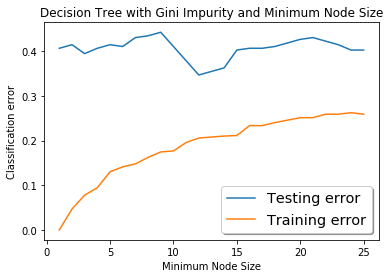

Test error minimized at min_samples_leaf = 12


In [53]:
# Seed the random number generator:
np.random.seed(1)

min_samples_leaf = np.arange(1, 26)
clf = tree.DecisionTreeClassifier(criterion='gini')

train_err, test_err = eval_tree_based_model_min_samples(clf, min_samples_leaf, train_data, train_label, test_data, test_label)

plt.figure()
plt.plot(min_samples_leaf, test_err, label='Testing error')
plt.plot(min_samples_leaf, train_err, label='Training error')
plt.xlabel('Minimum Node Size')
plt.ylabel('Classification error')
plt.title('Decision Tree with Gini Impurity and Minimum Node Size')
plt.legend(loc=0, shadow=True, fontsize='x-large')
plt.show()

print('Test error minimized at min_samples_leaf = %i' % min_samples_leaf[np.argmin(test_err)])

## Problem 2B: Decision Trees with Maximum Depth Stopping Criterion

Fill in the function below:

In [54]:
def eval_tree_based_model_max_depth(clf, max_depth, X_train, y_train, X_test, y_test):
    """
    This function evaluates the given classifier (either a decision tree or random forest) at all of the 
    maximum tree depth parameters in the vector max_depth, using the given training and testing
    data. It returns two vector, with the training and testing classification errors.
    
    Inputs:
        clf: either a decision tree or random forest classifier object
        max_depth: a (T, ) vector of all the max_depth stopping condition parameters 
                            to test, where T is the number of parameters to test
        X_train: (N, D) matrix of training samples.
        y_train: (N, ) vector of training labels.
        X_test: (N, D) matrix of test samples
        y_test: (N, ) vector of test labels
    Output:
        train_err: (T, ) vector of classification errors on the training data
        test_err: (T, ) vector of classification errors on the test data
    """
    #================================================================
    # TODO: Implement the eval_tree_based_model_max_depth function,
    # based on the above instructions.
    #================================================================ 
    train_err = []
    test_err = []
    
    for d in max_depth:
        clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=d)

        clf.fit(X_train, y_train)
    
        trainPredicted = clf.predict(X_train)
        testPredicted = clf.predict(X_test)
    
        train_err.append(classification_err(trainPredicted, y_train))
        test_err.append(classification_err(testPredicted, y_test))
    
    return train_err, test_err


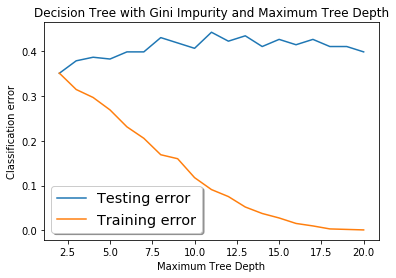

Test error minimized at max_depth = 2


In [57]:
# Seed the random number generator:
np.random.seed(1)

max_depth = np.arange(2, 21)

clf = tree.DecisionTreeClassifier(criterion='gini')

train_err, test_err = eval_tree_based_model_max_depth(clf, max_depth, train_data, 
                                                        train_label, test_data, test_label)

plt.figure()
plt.plot(max_depth, test_err, label='Testing error')
plt.plot(max_depth, train_err, label='Training error')
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Classification error')
plt.title('Decision Tree with Gini Impurity and Maximum Tree Depth')
plt.legend(loc=0, shadow=True, fontsize='x-large')
plt.show()

print('Test error minimized at max_depth = %i' % max_depth[np.argmin(test_err)])

## Problem 2D: Random Forests with Minimum Leaf Size Stopping Criterion

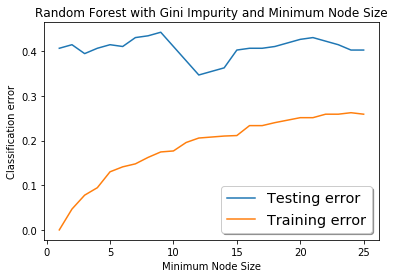

Test error minimized at min_samples_leaf = 12


In [55]:
# Seed the random number generator:
np.random.seed(1)

n_estimators = 1000
clf = RandomForestClassifier(n_estimators = n_estimators, criterion = 'gini')

min_samples_leaf = np.arange(1, 26)

train_err, test_err = eval_tree_based_model_min_samples(clf, min_samples_leaf, train_data, 
                                                        train_label, test_data, test_label)

plt.figure()
plt.plot(min_samples_leaf, test_err, label='Testing error')
plt.plot(min_samples_leaf, train_err, label='Training error')
plt.xlabel('Minimum Node Size')
plt.ylabel('Classification error')
plt.title('Random Forest with Gini Impurity and Minimum Node Size')
plt.legend(loc=0, shadow=True, fontsize='x-large')
plt.show()

print('Test error minimized at min_samples_leaf = %i' % min_samples_leaf[np.argmin(test_err)])

## Problem 2E: Random Forests with Maximum Depth Stopping Criterion

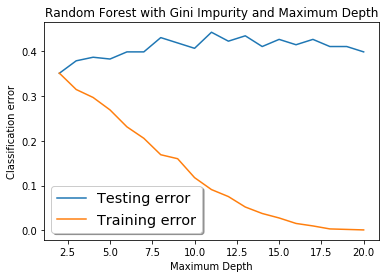

Test error minimized at max_depth = 2


In [56]:
# Seed the random number generator:
np.random.seed(1)

clf = RandomForestClassifier(n_estimators = n_estimators, criterion = 'gini')

max_depth = np.arange(2, 21)

train_err, test_err = eval_tree_based_model_max_depth(clf, max_depth, train_data, 
                                                        train_label, test_data, test_label)

plt.figure()
plt.plot(max_depth, test_err, label='Testing error')
plt.plot(max_depth, train_err, label='Training error')
plt.xlabel('Maximum Depth')
plt.ylabel('Classification error')
plt.title('Random Forest with Gini Impurity and Maximum Depth')
plt.legend(loc=0, shadow=True, fontsize='x-large')
plt.show()

print('Test error minimized at max_depth = %i' % max_depth[np.argmin(test_err)])